In [1]:
import torch
import sys

import numpy as np
import matplotlib.pyplot as plt

/home/henning/.local/lib/python3.11/site-packages/matplotlib/projections/__init__.py:63: UserWarning: Unable to import Axes3D. This may be due to multiple versions of Matplotlib being installed (e.g. as a system package and as a pip package). As a result, the 3D projection is not available.
  warnings.warn("Unable to import Axes3D. This may be due to multiple versions of "


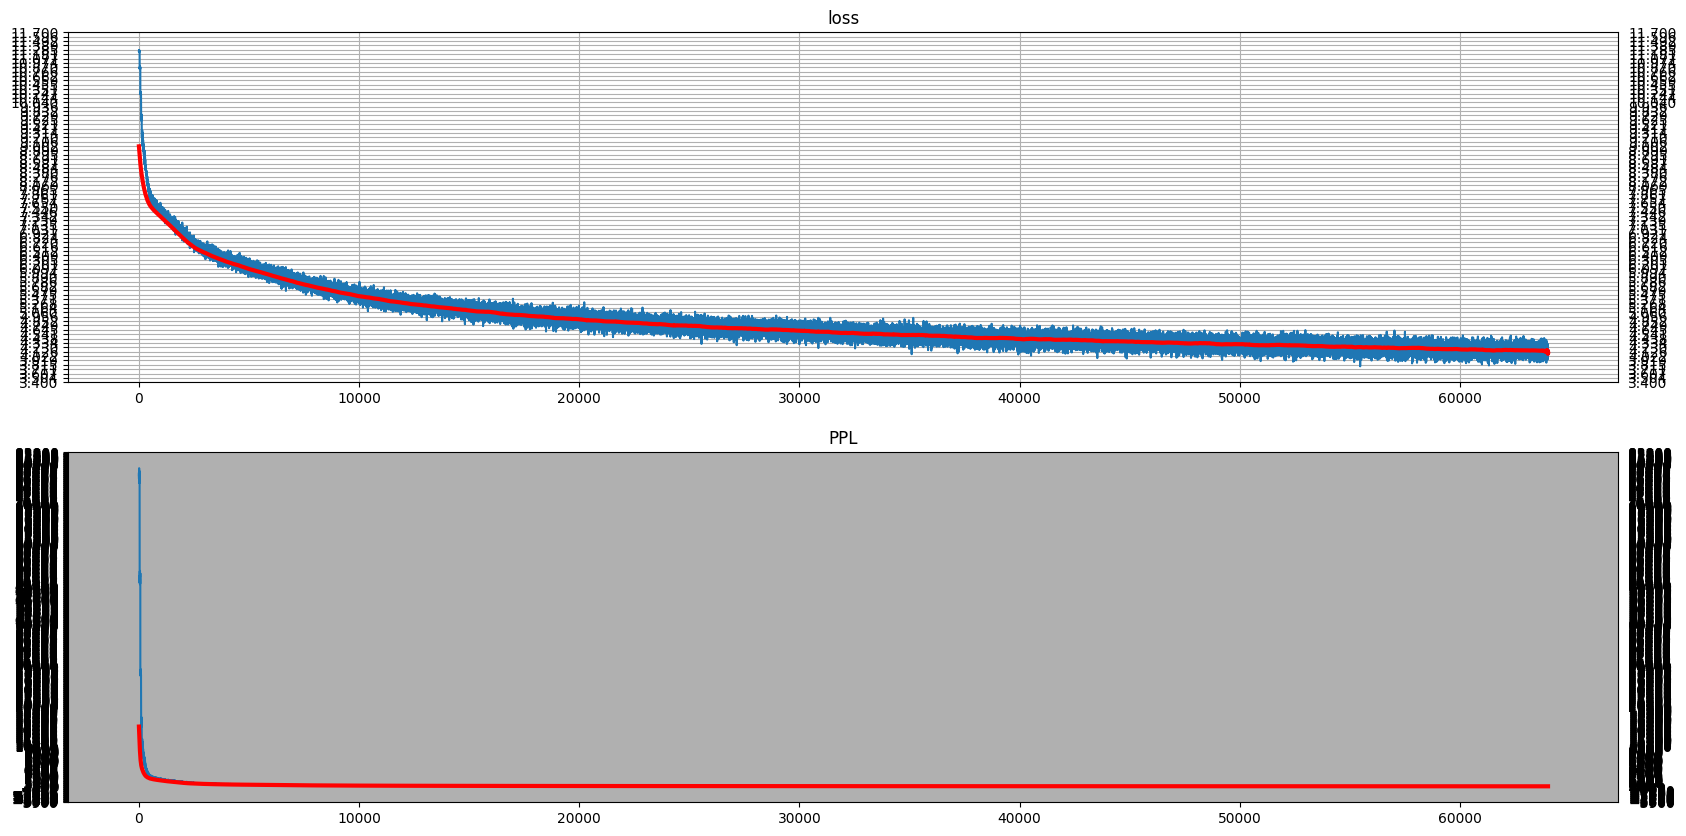

In [2]:
with torch.no_grad():
    checkpoint = torch.load(f"models/text_embedding-checkpoint-00000.pth", map_location="cpu")

window = 512

losses = np.asarray(checkpoint["losses"])[1:, -1]
ppls = np.asarray(checkpoint["ppls"])[1:, -1]

windowed_mean_losses = np.array([losses[i:i + window].mean() for i in range(len(losses))])
windowed_mean_ppls = np.array([ppls[i:i + window].mean() for i in range(len(ppls))])

fig, axes = plt.subplots(2, 1, figsize=(20, 10))

axes[0].plot(losses)
axes[0].plot(windowed_mean_losses, color="red", linewidth=3)
axes[0].set_title("loss")
axes[0].grid()

ymin, ymax = axes[0].get_ylim()
ymin = np.round(ymin, decimals=1)
ymax = np.round(ymax, decimals=1)
diff = int(ymax - ymin) * 10
yticks = np.linspace(ymin, ymax, diff + 1)
axes[0].set_yticks(yticks)
axes[0].tick_params(labelleft=True, labelright=True)

axes[1].plot(ppls)
axes[1].plot(windowed_mean_ppls, color="red", linewidth=3)
axes[1].set_title("PPL")
axes[1].grid()

ymin, ymax = axes[1].get_ylim()
ymin = np.round(ymin, decimals=-2)
ymax = np.round(ymax, decimals=-2)
diff = int((ymax - ymin) / 100)
yticks = np.linspace(ymin, ymax, diff + 1)
axes[1].set_yticks(yticks)
axes[1].tick_params(labelleft=True, labelright=True)

plt.show()